# EDA

---

In [2]:
import pandas as pd

# Load the train dataset
train_df = pd.read_csv('/Users/jailynneestevez/Downloads/hms-harmful-brain-activity-classification/train.csv')

# Display the first few rows of the dataframe
train_df.head()

,eeg_id,eeg_sub_id,eeg_label_offset_seconds,spectrogram_id,spectrogram_sub_id,spectrogram_label_offset_seconds,label_id,patient_id,expert_consensus,seizure_vote,lpd_vote,gpd_vote,lrda_vote,grda_vote,other_vote
0,1628180742,0,0.0,353733,0,0.0,127492639,42516,Seizure,3,0,0,0,0,0
1,1628180742,1,6.0,353733,1,6.0,3887563113,42516,Seizure,3,0,0,0,0,0
2,1628180742,2,8.0,353733,2,8.0,1142670488,42516,Seizure,3,0,0,0,0,0
3,1628180742,3,18.0,353733,3,18.0,2718991173,42516,Seizure,3,0,0,0,0,0
4,1628180742,4,24.0,353733,4,24.0,3080632009,42516,Seizure,3,0,0,0,0,0


In [3]:
# Generate a statistical summary for the numerical columns
statistical_summary = train_df.describe()

# Check for missing values
missing_values = train_df.isnull().sum()

(statistical_summary, missing_values)


(             eeg_id     eeg_sub_id  eeg_label_offset_seconds  spectrogram_id  \
 count  1.068000e+05  106800.000000             106800.000000    1.068000e+05   
 mean   2.104387e+09      26.286189                118.817228    1.067262e+09   
 std    1.233371e+09      69.757658                314.557803    6.291475e+08   
 min    5.686570e+05       0.000000                  0.000000    3.537330e+05   
 25%    1.026896e+09       1.000000                  6.000000    5.238626e+08   
 50%    2.071326e+09       5.000000                 26.000000    1.057904e+09   
 75%    3.172787e+09      16.000000                 82.000000    1.623195e+09   
 max    4.294958e+09     742.000000               3372.000000    2.147388e+09   
 
        spectrogram_sub_id  spectrogram_label_offset_seconds      label_id  \
 count       106800.000000                     106800.000000  1.068000e+05   
 mean            43.733596                        520.431404  2.141415e+09   
 std            104.292116         

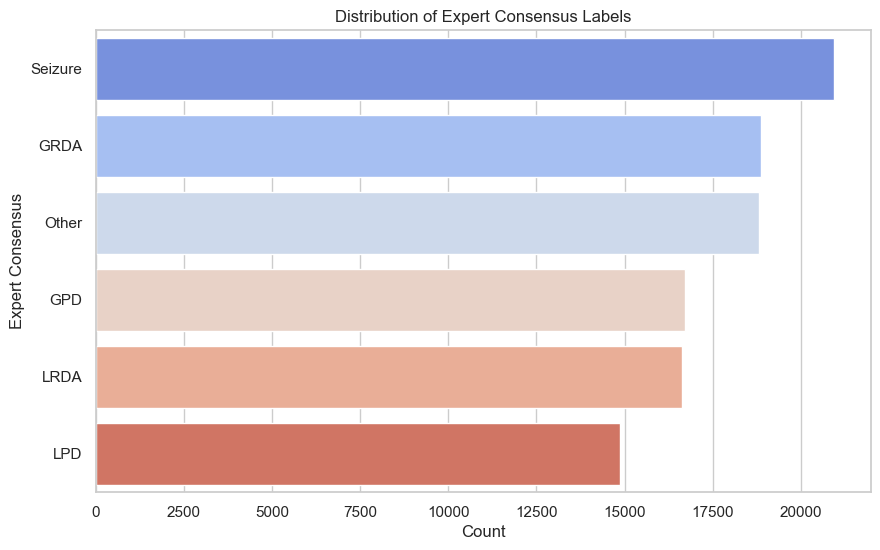

/Users/jailynneestevez/opt/anaconda3/envs/mytfenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/jailynneestevez/opt/anaconda3/envs/mytfenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/jailynneestevez/opt/anaconda3/envs/mytfenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/jailynneestevez/opt/anaconda3/envs/mytfenv/lib/python3.9/site-packages/seaborn/_oldcore.py

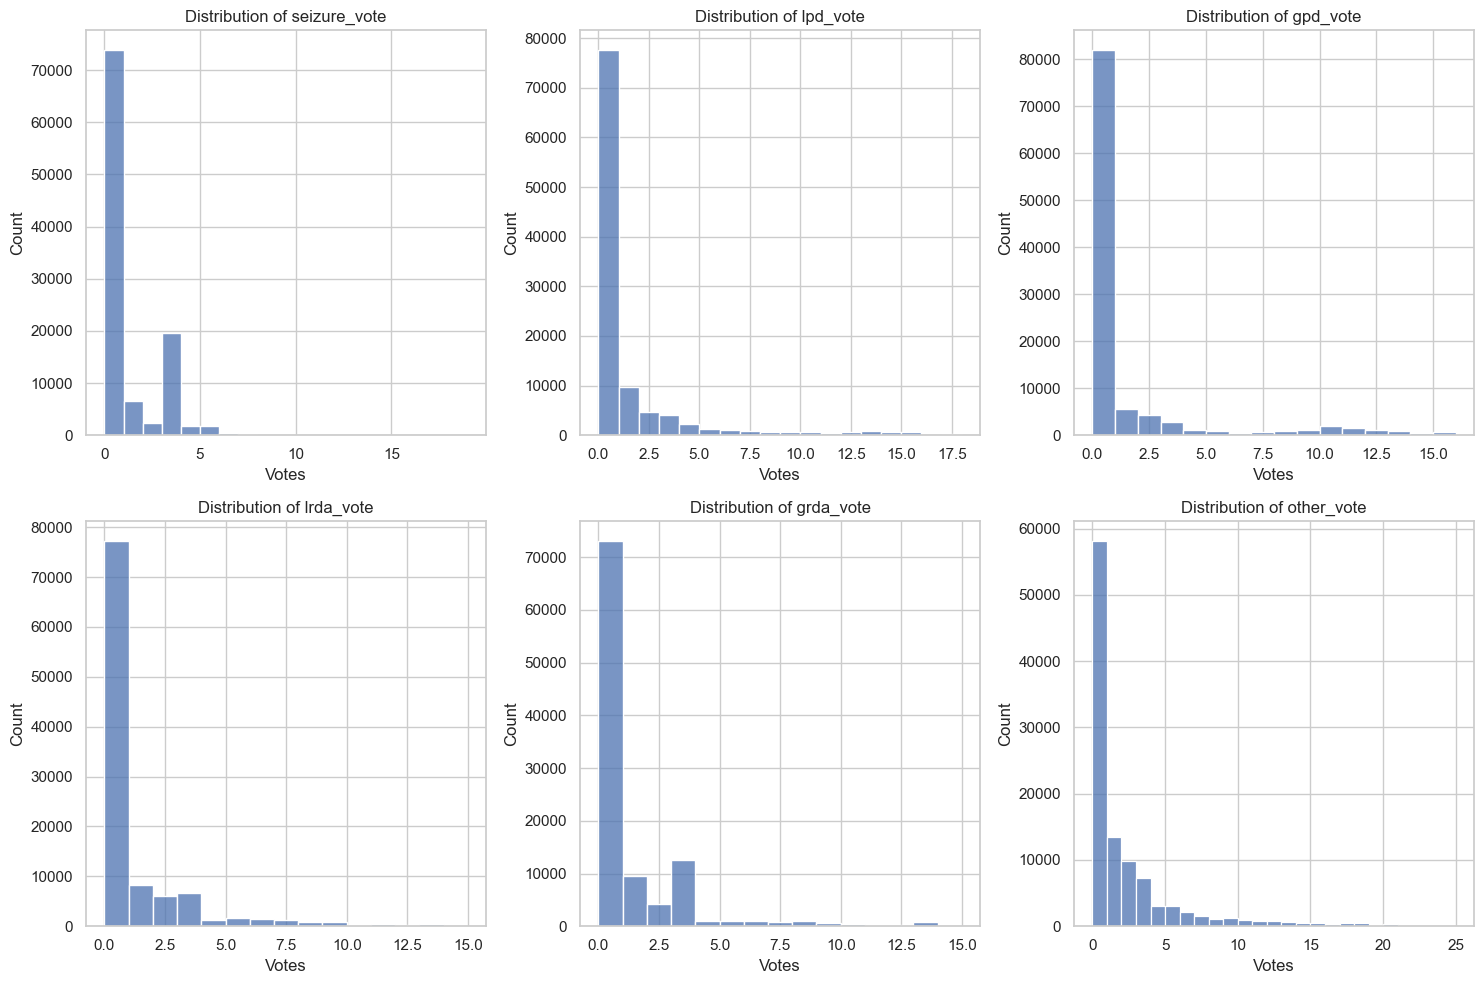

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the visualisation style
sns.set(style="whitegrid")

# Plot distribution of 'expert_consensus' labels
plt.figure(figsize=(10, 6))
sns.countplot(y='expert_consensus', data=train_df, order = train_df['expert_consensus'].value_counts().index, palette='coolwarm')
plt.title('Distribution of Expert Consensus Labels')
plt.xlabel('Count')
plt.ylabel('Expert Consensus')
plt.show()

# Plot distribution of votes for each EEG pattern
vote_columns = ['seizure_vote', 'lpd_vote', 'gpd_vote', 'lrda_vote', 'grda_vote', 'other_vote']
plt.figure(figsize=(15, 10))
for i, column in enumerate(vote_columns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(train_df[column], bins=max(train_df[column]), kde=False)
    plt.title(f'Distribution of {column}')
    plt.xlabel('Votes')
    plt.ylabel('Count')
plt.tight_layout()
plt.show()